In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import figure

import sys
sys.path.append('../utilities/')
import column_name_mapping as u_cnm
import column_name_mapping as u_cnm
import general_tools as u_gt
import dataframe_operations as u_do
import data_types as u_dt
import data_quality as u_dq

In [2]:
data_raw    = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_data.csv')
output_raw = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_output.csv')
df = data_raw.merge(output_raw, how='inner', on='id')

In [3]:
summary = u_dt.dtype_summarizer(df)

Available dtypes: ['object', 'float64', 'int64']


,min,25%,50%,75%,max
campaign_disc_ele,NaN,NaN,NaN,NaN,NaN
forecast_base_bill_ele,-4.605170,-4.605170,5.093474,5.981881,9.438756
forecast_base_bill_year,-4.605170,-4.605170,5.093474,5.981881,9.438756
forecast_bill_12m,-4.605170,7.054601,7.690391,8.353863,11.303717
forecast_cons,-4.605170,-4.605170,3.742775,5.429861,9.178116
forecast_cons_12m,-4.605170,6.240724,7.072558,7.898068,11.550240
forecast_discount_energy,-4.605170,-4.605170,-4.605170,-4.605170,3.912023
forecast_meter_rent_12m,-4.605170,2.786861,2.967333,4.878779,7.788083
forecast_price_energy_p1,0.000000,0.115237,0.142881,0.146348,0.273963
forecast_price_energy_p2,0.000000,0.000000,0.086163,0.098837,0.195975


Alert: campaign_disc_ele is completely empty


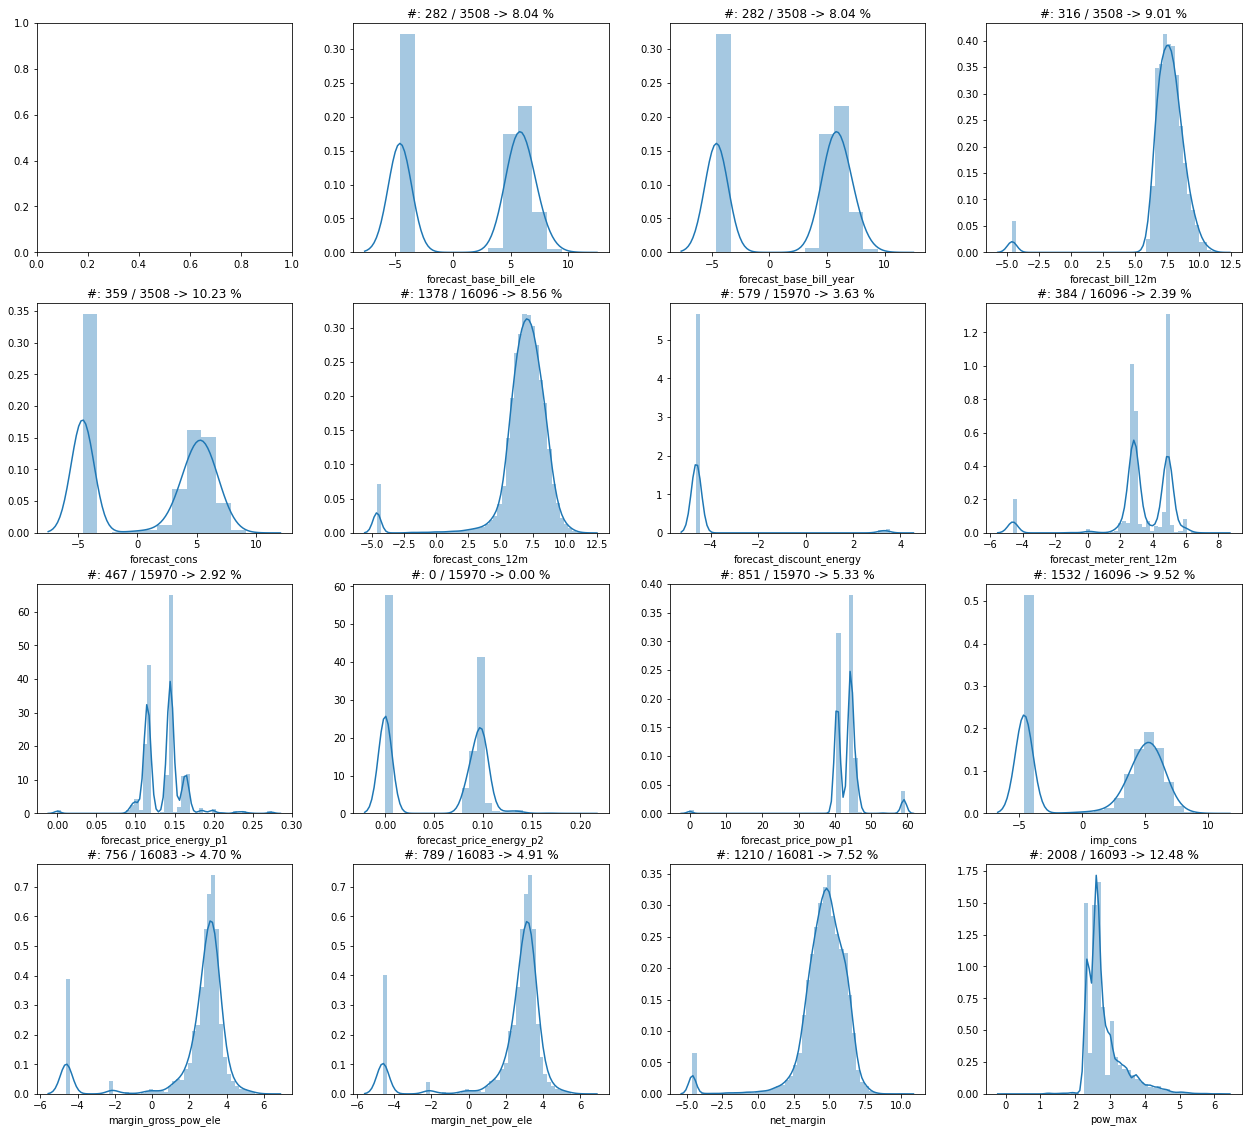

In [4]:
transformations = {
    'type': 'exception',
    'transformation': 'log',
    'exceptions': ['forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1']
}
display(u_dq.quantile_describe(
    u_dq.apply_transformations(df, summary.cols_of_type('float64'), transformations)
))
u_dq.distplot_grid(df, summary.cols_of_type('float64'), transformations=transformations)

,min,25%,50%,75%,max
cons_12m,-4.60517,8.683766,9.637730,10.824198,16.594150
cons_gas_12m,-4.60517,-4.605170,-4.605170,-4.605170,15.247839
cons_last_month,-4.60517,-4.605170,6.803505,8.325306,15.328156
forecast_cons_year,-4.60517,-4.605170,5.934894,7.598023,12.074682
nb_prod_act,0.00000,0.000000,0.000000,0.000000,3.465736
num_years_antig,1.00000,4.000000,5.000000,6.000000,16.000000
churn,0.00000,0.000000,0.000000,0.000000,1.000000


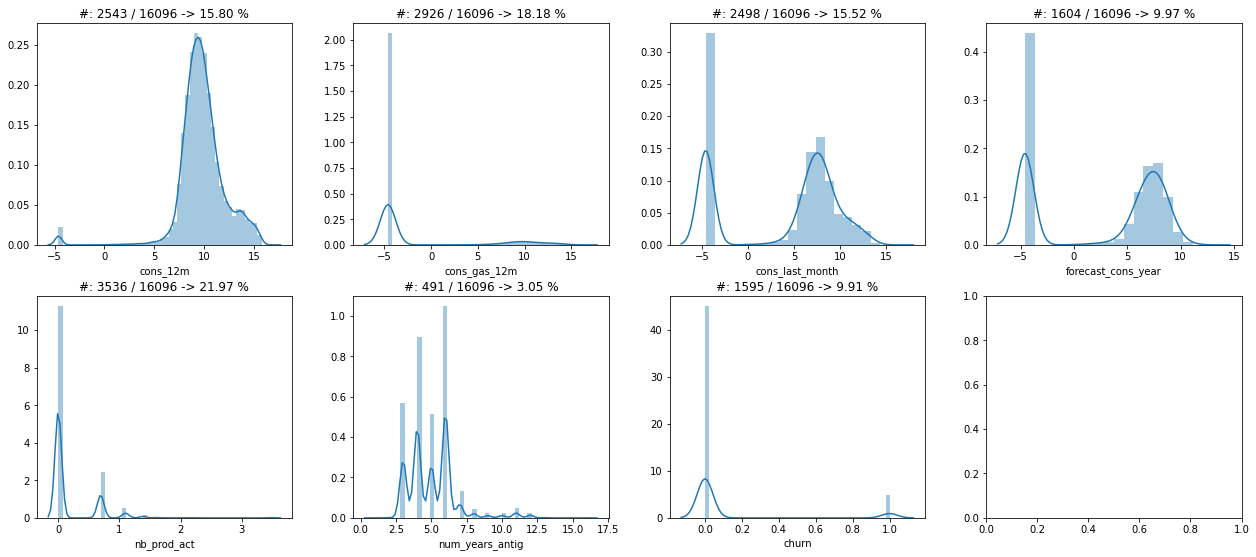

In [5]:
transformations = {
    'type': 'exception',
    'transformation': 'log',
    'exceptions': ['num_years_antig', 'churn']
}
display(u_dq.quantile_describe(
    u_dq.apply_transformations(df, summary.cols_of_type('int64'), transformations)
))
u_dq.distplot_grid(df, summary.cols_of_type('int64'), transformations=transformations)

In [6]:
[x for x in sys.modules.keys() if 'general_tools' in x]

['general_tools']